In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.sample(frac = 1, random_state = 1).reset_index()

,index,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,29633,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,345,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36369,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16624,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14389,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,7813,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,32511,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,5192,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,12172,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train = df[:int(42000*0.8)]
test = df[int(42000*0.8):]
X_train = np.array(train.drop(['label'], axis = 1))/255.0
Y_train = train['label'].tolist()
y_train = np.zeros((len(Y_train),10))
for i in range(len(Y_train)):
    y_train[i,Y_train[i]] = 1
X_test = np.array(test.drop('label', axis = 1))/255.0
Y_test = test['label'].tolist()
y_test = np.zeros((len(Y_test),10))
for i in range(len(Y_test)):
    y_test[i,Y_test[i]] = 1

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
inputs = tf.keras.Input(shape = 784)
x = Dense(100, activation = 'relu')(inputs)
x = Dense(10, activation = 'softmax')(x)
MLP = tf.keras.Model(inputs, x)
MLP.summary()

2022-12-11 12:56:51.029017: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
MLP.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = MLP.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=25,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

2022-12-11 12:56:51.845700: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3453 - accuracy: 0.9015 - val_loss: 0.2079 - val_accuracy: 0.9407
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1679 - accuracy: 0.9511 - val_loss: 0.1453 - val_accuracy: 0.9550
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1173 - accuracy: 0.9657 - val_loss: 0.1272 - val_accuracy: 0.9618
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0892 - accuracy: 0.9739 - val_loss: 0.1067 - val_accuracy: 0.9676
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0682 - accuracy: 0.9793 - val_loss: 0.1021 - val_accuracy: 0.9665
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.1082 - val_accuracy: 0.9654
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0964 - val_accuracy:

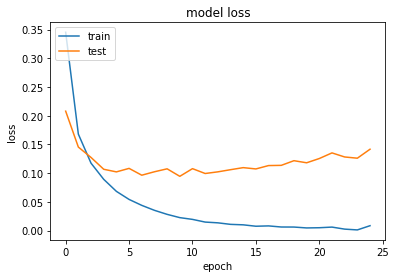

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

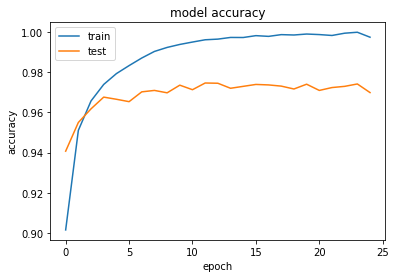

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [10]:
from tensorflow.keras.layers import Dropout
inputs = tf.keras.Input(shape = 28*28)
x = Dense(100,activation = 'relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(10, activation = 'softmax')(x)
MLP_Dropout = tf.keras.Model(inputs, x)
MLP_Dropout.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
MLP_Dropout.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = MLP_Dropout.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=40,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Epoch 1/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3998 - accuracy: 0.8841 - val_loss: 0.1954 - val_accuracy: 0.9435
Epoch 2/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1995 - accuracy: 0.9417 - val_loss: 0.1532 - val_accuracy: 0.9531
Epoch 3/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1500 - accuracy: 0.9557 - val_loss: 0.1245 - val_accuracy: 0.9619
Epoch 4/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1232 - accuracy: 0.9629 - val_loss: 0.1084 - val_accuracy: 0.9658
Epoch 5/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1019 - accuracy: 0.9683 - val_loss: 0.1015 - val_accuracy: 0.9690
Epoch 6/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0911 - accuracy: 0.9712 - val_loss: 0.0972 - val_accuracy: 0.9695
Epoch 7/40
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0936 - val_accuracy:

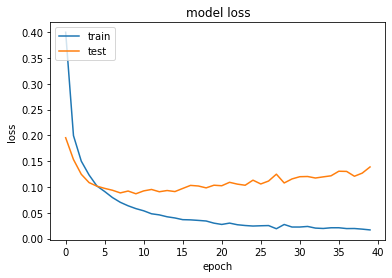

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

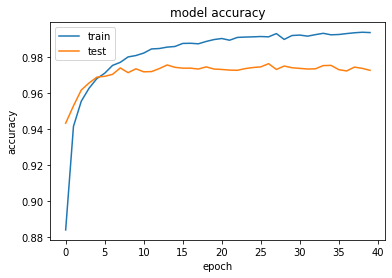

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [14]:
X_train = np.array(X_train).reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
cnn = tf.keras.Model(inputs, x)
cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128 

In [16]:
cnn.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=25,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Epoch 1/25
1050/1050 [==============================] - 50s 46ms/step - loss: 0.2368 - accuracy: 0.9393 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 2/25
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0603 - accuracy: 0.9833 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 3/25
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0454 - accuracy: 0.9870 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 4/25
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.0379 - val_accuracy: 0.9885
Epoch 5/25
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 6/25
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 7/25
1050/1050 [==============================] - 50s 47ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0331 -

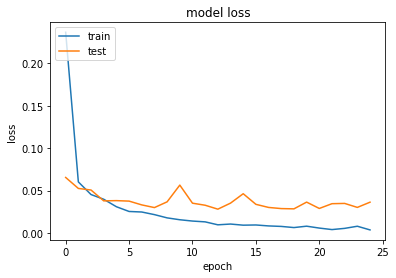

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

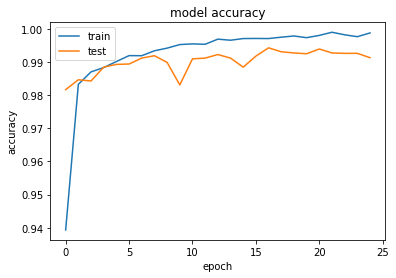

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [19]:
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
cnn = tf.keras.Model(inputs, x)
cnn.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range = 0.2
    )

In [20]:
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 62s 57ms/step - loss: 0.3256 - accuracy: 0.9099 - val_loss: 0.2103 - val_accuracy: 0.9404
Epoch 2/40
1050/1050 [==============================] - 58s 56ms/step - loss: 0.0831 - accuracy: 0.9757 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 3/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 4/40
1050/1050 [==============================] - 58s 55ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 5/40
1050/1050 [==============================] - 58s 55ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 6/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0370 - val_accuracy: 0.9904
Epoch 7/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0309 -

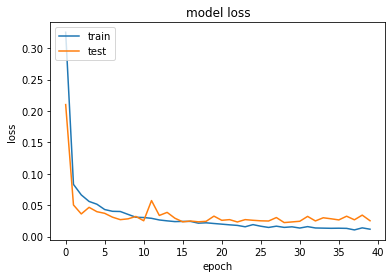

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

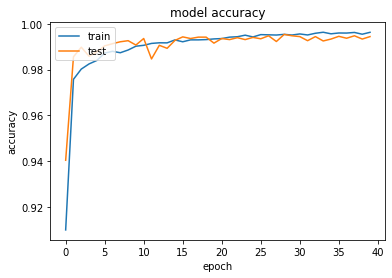

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [23]:
from tensorflow.keras.layers import Add
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x_shortcut = x
x_shortcut = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x_shortcut)
x_shortcut = BatchNormalization()(x_shortcut)
x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Add()([x,x_shortcut])

x_shortcut = x
x_shortcut = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x_shortcut)
x_shortcut = BatchNormalization()(x_shortcut)
x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Add()([x,x_shortcut])

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
resnet = tf.keras.Model(inputs, x)
resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 28, 28, 16)   64          conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 28, 28, 16)   2320        batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [24]:
resnet.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
datagen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range = 0.2
    )

In [25]:
history = resnet.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 68s 63ms/step - loss: 0.3028 - accuracy: 0.9151 - val_loss: 0.0734 - val_accuracy: 0.9807
Epoch 2/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0842 - accuracy: 0.9749 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 3/40
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 4/40
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 5/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0449 - val_accuracy: 0.9874
Epoch 6/40
1050/1050 [==============================] - 67s 63ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0343 - val_accuracy: 0.9907
Epoch 7/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0316 -

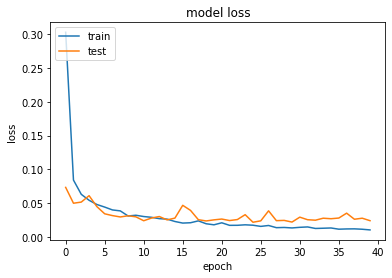

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

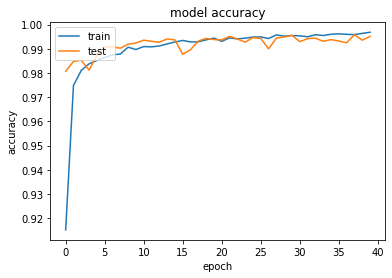

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')